# Project: 모두카페 꼼꼼히 살펴보기

## 상황 인식과 문제 정의

### 1. 상황 인식
'모두카페'라는 스터디카페 데이터를 분석하여 이 카페가 더 잘되기 위한 운영 전략을 제시 <br>
데이터는 총 4개이다.
- `entry_data`: 시간별 입장 기록 데이터
- `sales_data`: 시간별 음식/음료 판매 데이터
- `item_data`: 판매하고 있는 음식/음료 종류와 가격
- `item_entry_data`: 입장권 종류와 가격

### 2. 문제 정의
> 핵심 문제: 모두카페의 상태는 어떤가

- 월별 매출액 추세
- 가장 인기있는 음식/음료
- 가장 많이 팔린 입장권 종류

## 데이터 분석

### 1. 데이터 불러오기

In [2]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [5]:
# 데이터 호출
entry_data = pd.read_csv('./data/entry_data.csv')
sales_data = pd.read_csv('./data/sales_data.csv')
item_data = pd.read_csv('./data/item_data.csv')
item_entry_data = pd.read_csv('./data/item_entry_data.csv')

In [6]:
# entry_data 데이터 정보 확인
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


중복 데이터가 있으니 분석 시 제거해줄 필요가 있다.

In [7]:
# sales_data 데이터 정보 확인
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [8]:
# item_data 데이터 정보 확인
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [9]:
# item_entry_data 데이터 정보 확인
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 2. 데이터 분석하기

#### 1) 월별 매출액 추세

In [13]:
temp_var = sales_data.copy()

temp_var["date"] = sales_data["결제일시"].str[:7]

In [14]:
temp_var["결제금액"] = temp_var["결제금액"].str.replace(",", "")
temp_var["결제금액"] = temp_var["결제금액"].astype(int)

# 결제금액열을 date 기준으로 집계하기
payment_data = temp_var.groupby("date").sum()["결제금액"]

In [15]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

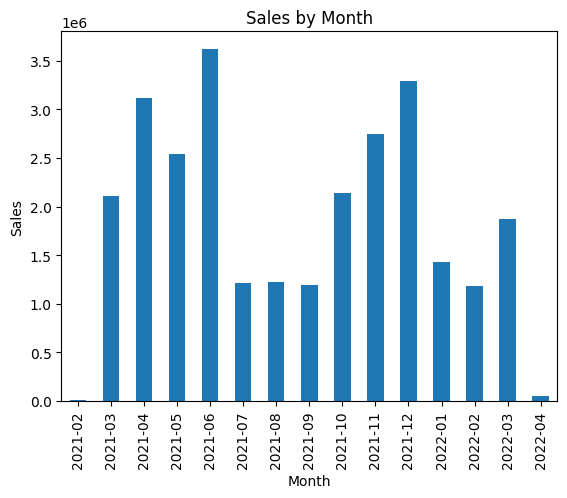

In [19]:
# 집계 결과 시각화
payment_data.plot(kind="bar")

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")

plt.show()

학기 중에 이용이 많은 것을 알 수 있다.

#### 2) 가장 인기 있는 음식/음료

In [20]:
temp_var = temp_var[~(temp_var['판매수량']==-1)]
items_count = pd.DataFrame(temp_var["상품명"].value_counts())[:10]

In [21]:
items_count

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


In [22]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


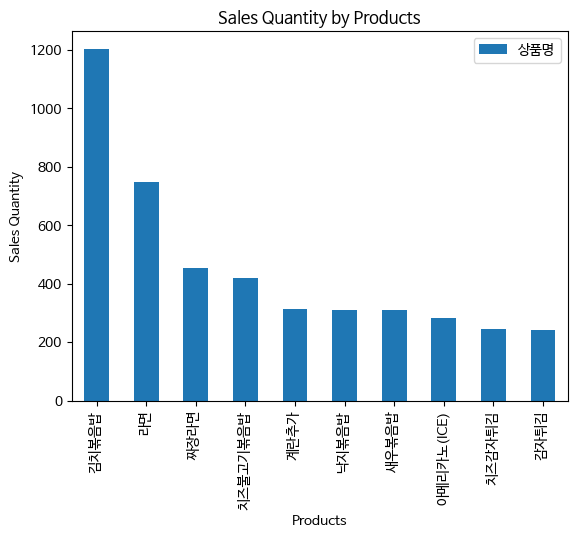

In [30]:
# 집계 결과 시각화
items_count.plot(kind="bar")

plt.xlabel("Products")
plt.ylabel("Sales Quantity")
plt.title("Sales Quantity by Products")

plt.show()

In [25]:
# 결제금액열을 상품명을 기준으로 집계
items_payment = temp_var.groupby("상품명").sum()["결제금액"]
# 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)[:10]

In [26]:
items_payment

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: 결제금액, dtype: int64

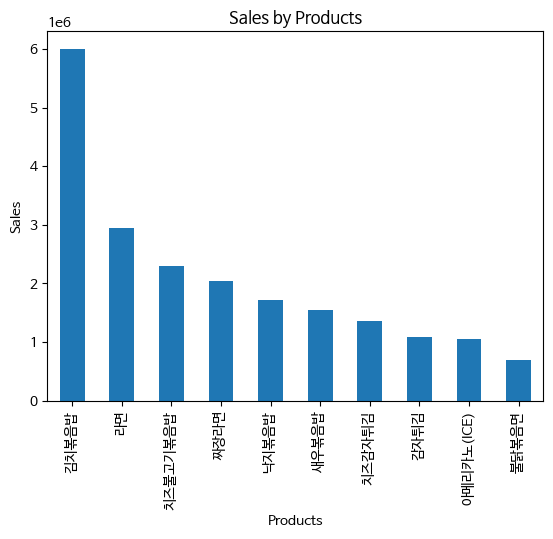

In [32]:
# 집계 결과 시각화하기
items_payment.plot(kind="bar")

plt.xlabel("Products")
plt.ylabel("Sales")
plt.title("Sales by Products")

plt.show()

김치볶음밥과 라면이 판매량/판매금액 모두 높다

#### 3) 가장 많이 팔린 입장권 종류

In [40]:
temp_var = entry_data.copy().drop_duplicates()
temp_var["금액"] = temp_var["금액"].astype(int)
# 요금제명 기준으로 집계하기
tickets = temp_var.groupby("요금제명").sum()["금액"]
# 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)[:10]

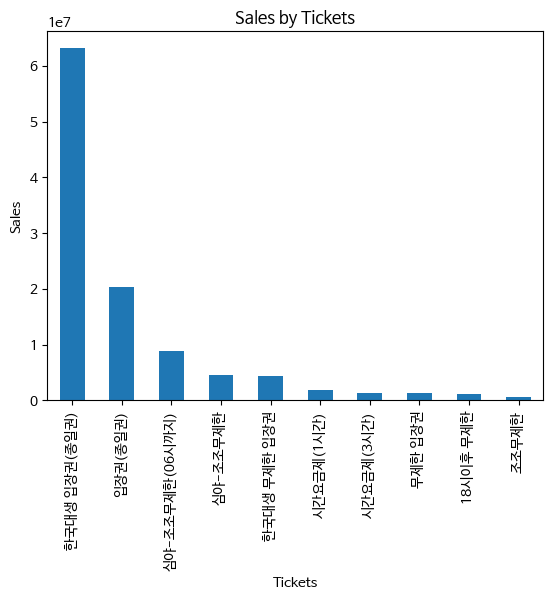

In [41]:
tickets.plot(kind="bar")

plt.xlabel("Tickets")
plt.ylabel("Sales")
plt.title("Sales by Tickets")

plt.show()

한국대생(종일권), 입장권(종일권) 순으로 많이 팔렸다. <br>
주로 이용하는 고객이 한국대생인 것을 알 수 있고, 고객 대부분 종일권을 이용한다는 것도 확인할 수 있다.

### 4) 방학 기간 이용 현황
- 1, 2, 7, 8월

In [48]:
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,month
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,4
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,4
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,4
7,한국대생 무제한 입장권,2022-04-01 19:32,2022-04-01 22:28,오전 2:56:00,선불기2,6400,퇴실,customer498538,4
11,한국대생 무제한 입장권,2022-04-01 18:46,2022-04-01 21:38,오전 2:52:00,선불기2,6400,퇴실,customer899296,4
...,...,...,...,...,...,...,...,...,...
22548,시간권,2021-02-17 13:11,2021-02-17 13:14,오전 12:02:00,선불기2,0,퇴실,customer715819,2
22549,종일요금제,2021-02-17 13:10,2021-02-17 14:19,오전 1:09:00,선불기1,6500,퇴실,customer774105,2
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2


In [45]:
temp_var = entry_data.copy().drop_duplicates()
temp_var["month"] = temp_var["입실"].str[5:7]
temp_var["month"] = temp_var["month"].astype(int)

In [51]:
vacation_entry = temp_var.loc[temp_var["month"].isin([1, 2, 7, 8])]
vacation_entry.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,month
1454,심야-조조무제한,2022-02-28 23:33,2022-03-01 1:35,오전 2:02:00,선불기2,5000,퇴실,customer453884,2
1455,심야-조조무제한,2022-02-28 22:36,2022-03-01 1:45,오전 3:09:00,선불기2,5000,퇴실,customer293254,2
1456,심야-조조무제한,2022-02-28 22:16,2022-03-01 7:24,오전 9:08:00,선불기2,5000,퇴실,customer847542,2
1457,심야-조조무제한,2022-02-28 21:04,2022-03-01 1:28,오전 4:24:00,선불기2,5000,퇴실,customer567142,2
1458,한국대생 입장권(종일권),2022-02-28 20:31,2022-03-01 1:59,오전 5:28:00,선불기2,6500,퇴실,customer552974,2


In [55]:
vacation_tickets = vacation_entry.groupby("요금제명").sum()["금액"]
vacation_tickets = vacation_tickets.sort_values(ascending=False)[:10]

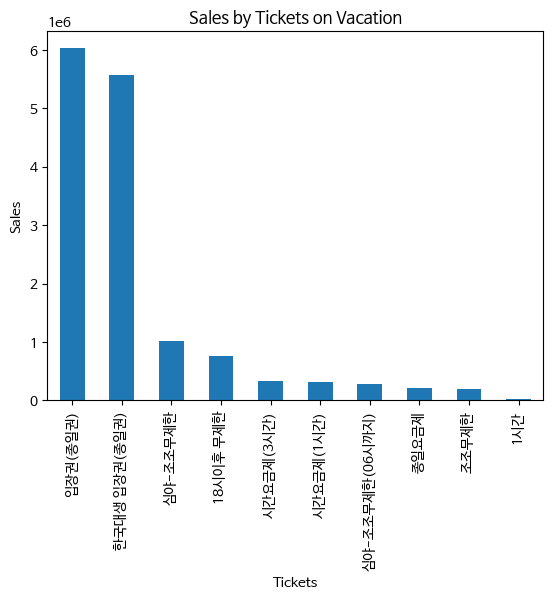

In [57]:
vacation_tickets.plot(kind="bar")

plt.xlabel("Tickets")
plt.ylabel("Sales")
plt.title("Sales by Tickets on Vacation")

plt.show()

방학 기간에는 근소하지만 한국대생이 아닌 일반 이용 고객의 이용이 더 많은 것을 확인할 수 있다.

#### 4) 여름방학/겨울방학 이용 현황 비교

In [59]:
vacation_entry["Vacation"] = "winter"
vacation_entry.loc[vacation_entry["month"].isin([7, 8]), "Vacation"] = "summer"
vacation_entry.head()

/tmp/ipykernel_31/2333113806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacation_entry["Vacation"] = "winter"
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,요금제명,입실,퇴실,이용,위치,금액,구분,고객,month,Vacation
1454,심야-조조무제한,2022-02-28 23:33,2022-03-01 1:35,오전 2:02:00,선불기2,5000,퇴실,customer453884,2,winter
1455,심야-조조무제한,2022-02-28 22:36,2022-03-01 1:45,오전 3:09:00,선불기2,5000,퇴실,customer293254,2,winter
1456,심야-조조무제한,2022-02-28 22:16,2022-03-01 7:24,오전 9:08:00,선불기2,5000,퇴실,customer847542,2,winter
1457,심야-조조무제한,2022-02-28 21:04,2022-03-01 1:28,오전 4:24:00,선불기2,5000,퇴실,customer567142,2,winter
1458,한국대생 입장권(종일권),2022-02-28 20:31,2022-03-01 1:59,오전 5:28:00,선불기2,6500,퇴실,customer552974,2,winter


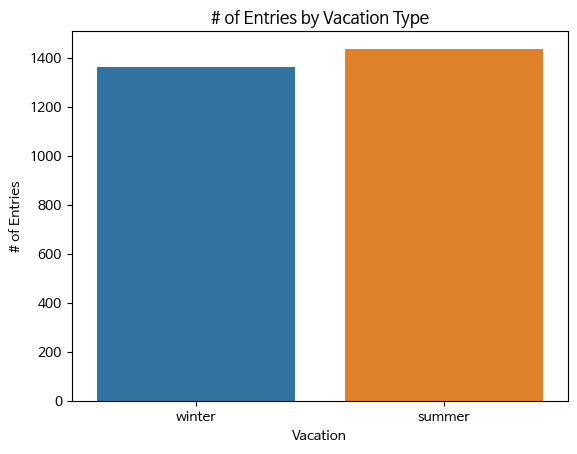

In [70]:
sns.countplot(x="Vacation", data=vacation_entry)
plt.xlabel("Vacation")
plt.ylabel("# of Entries")
plt.title("# of Entries by Vacation Type")

plt.show()

여름방학에 이용 고객 수가 근소하게 더 많은 것을 확인할 수 있다.(큰 차이는 없다.)

#### 5) 여름방학/겨울방학 판매총액 비교

In [61]:
temp_var = sales_data.copy()

temp_var["month"] = sales_data["결제일시"].str[5:7]
temp_var["month"] = temp_var["month"].astype(int)

temp_var["결제금액"] = temp_var["결제금액"].str.replace(",", "")
temp_var["결제금액"] = temp_var["결제금액"].astype(int)
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,month
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,4
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,4
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,4
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,4
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,4


In [64]:
vacation_sales = temp_var.loc[temp_var["month"].isin([1, 2, 7, 8])]
vacation_sales["Vacation"] = "winter"
vacation_sales.loc[vacation_sales["month"].isin([7, 8]), "Vacation"] = "summer"
vacation_sales.head()

/tmp/ipykernel_31/866029968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacation_sales["Vacation"] = "winter"
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,month,Vacation
427,2022-02-28 20:05,선불기1,김치볶음밥,신용카드,결제완료,1,5000,customer394709,2,winter
428,2022-02-28 20:05,선불기1,낙지볶음밥,신용카드,결제완료,1,5500,customer394709,2,winter
429,2022-02-28 20:05,선불기1,감자튀김,신용카드,결제완료,1,4500,customer394709,2,winter
430,2022-02-28 13:35,선불기1,바닐라라떼(ICE),신용카드,결제완료,1,5000,customer337003,2,winter
431,2022-02-28 13:35,선불기1,카페모카(HOT),신용카드,결제완료,1,4500,customer337003,2,winter


In [68]:
grouped_df = vacation_sales.groupby("Vacation").sum()["결제금액"]

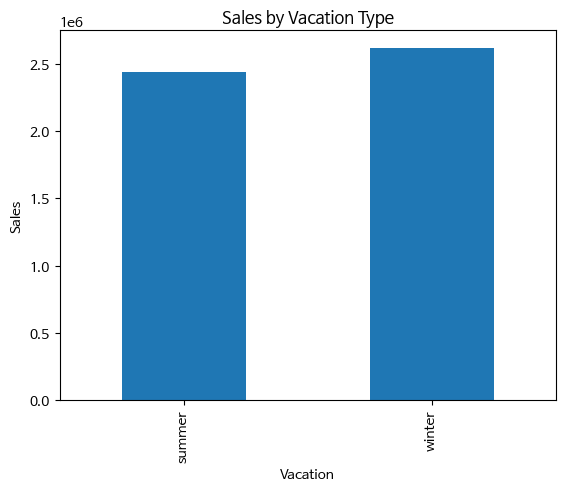

In [71]:
grouped_df.plot(kind="bar")

plt.xlabel("Vacation")
plt.ylabel("Sales")
plt.title("Sales by Vacation Type")

plt.show()

이용 고객 수는 여름에 더 많지만, 매출은 겨울에 더 많다. <br>
방학의 이용 고객 수, 매출액이 학기중에 비해 적은 것은 사실이니, 이 기간의 매출을 조금이라도 올리기 위해 조치를 취해야 한다고 생각한다. <br>
특히 여름의 이용 고객들이 더 많은 음식/음료를 구매하도록 유도하는 방안이 있으면 좋을 것 같다는 생각이 들었다. <br>
또한 이용 고객 수 자체를 늘리는 방안을 모색해보는 것도 좋은 방안일 것 같다.